In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_orig = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Dummy%20Marketing%20and%20Sales%20Data/Dummy%20Data%20HSS.csv")
df = df_orig.copy()

In [4]:
df = df.dropna()
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [5]:
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [7]:
df.Influencer.value_counts()

Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: Influencer, dtype: int64

In [8]:
df.Influencer.unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [9]:
df["Influencer_encoded"] = df["Influencer"]
influencer_mapping = {'Mega':3, 'Micro':1, 'Nano':0, 'Macro':2}
df["Influencer_encoded"] = df["Influencer_encoded"].map(influencer_mapping)
df.head()

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded
0,16.0,6.566231,2.907983,Mega,54.732757,3
1,13.0,9.237765,2.409567,Mega,46.677897,3
2,41.0,15.886446,2.913410,Mega,150.177829,3
3,83.0,30.020028,6.922304,Mega,298.246340,3
4,15.0,8.437408,1.405998,Micro,56.594181,1


In [10]:
col_names = ['Macro', 'Mega', 'Micro', 'Nano']
df.groupby("Influencer")["Sales"].mean()

Influencer
Macro    196.066150
Mega     190.412908
Micro    191.578370
Nano     191.708827
Name: Sales, dtype: float64

In [11]:
p = np.array(df.groupby("Influencer")["Sales"].mean())
p

array([196.06615039, 190.41290773, 191.57837021, 191.70882717])

In [12]:
influencer_df = pd.DataFrame()
influencer_df["Type"] = col_names
influencer_df["Value"] = p
influencer_df

,Type,Value
0,Macro,196.066150
1,Mega,190.412908
2,Micro,191.578370
3,Nano,191.708827


<AxesSubplot:xlabel='Type', ylabel='Value'>

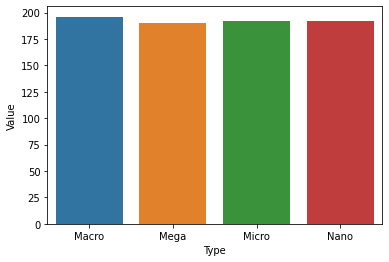

In [13]:
sns.barplot(x=influencer_df["Type"],y=influencer_df["Value"])

<AxesSubplot:xlabel='TV', ylabel='Sales'>

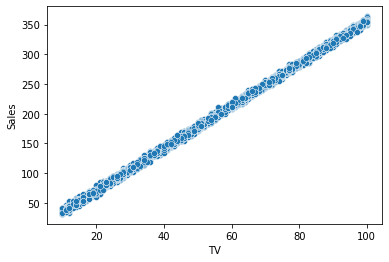

In [14]:
sns.scatterplot(x=df["TV"],y=df["Sales"],cmap="rainbow")

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

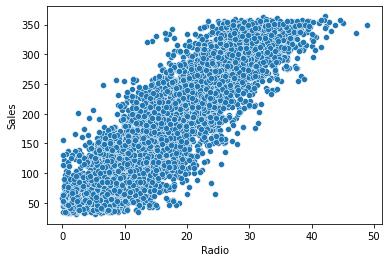

In [15]:
sns.scatterplot(x=df["Radio"],y=df["Sales"],cmap="rainbow")

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

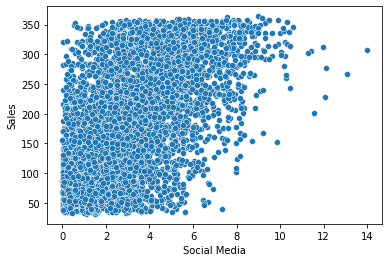

In [16]:
sns.scatterplot(x=df["Social Media"],y=df["Sales"])

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

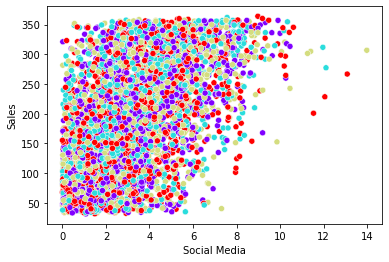

In [17]:
sns.scatterplot(x=df["Social Media"],y=df["Sales"],cmap="rainbow",c=df["Influencer_encoded"])

<AxesSubplot:xlabel='Influencer', ylabel='Social Media'>

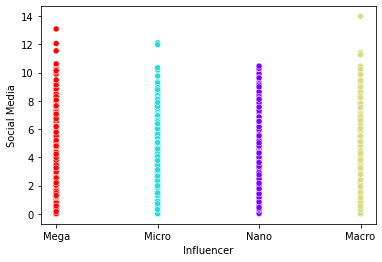

In [18]:
sns.scatterplot(x=df["Influencer"],y=df["Social Media"],cmap="rainbow",c=df["Influencer_encoded"])

In [20]:
df.groupby("Influencer")["Social Media"].mean()

Influencer
Macro    3.378459
Mega     3.370672
Micro    3.270513
Nano     3.275219
Name: Social Media, dtype: float64

In [21]:
df

,TV,Radio,Social Media,Influencer,Sales,Influencer_encoded
0,16.0,6.566231,2.907983,Mega,54.732757,3
1,13.0,9.237765,2.409567,Mega,46.677897,3
2,41.0,15.886446,2.913410,Mega,150.177829,3
3,83.0,30.020028,6.922304,Mega,298.246340,3
4,15.0,8.437408,1.405998,Micro,56.594181,1
...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866,1
4568,71.0,20.610685,6.545573,Nano,249.101915,0
4569,44.0,19.800072,5.096192,Micro,163.631457,1
4570,71.0,17.534640,1.940873,Macro,253.610411,2


In [22]:
inf_one_hot = pd.get_dummies(df["Influencer"],drop_first=True)
inf_one_hot

,Mega,Micro,Nano
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
4567,0,1,0
4568,0,0,1
4569,0,1,0
4570,0,0,0


In [23]:
df_encoded = pd.concat([df,inf_one_hot],axis=1)
df_encoded = df_encoded.drop(["Influencer",'Influencer_encoded'],axis=1)
df_encoded

,TV,Radio,Social Media,Sales,Mega,Micro,Nano
0,16.0,6.566231,2.907983,54.732757,1,0,0
1,13.0,9.237765,2.409567,46.677897,1,0,0
2,41.0,15.886446,2.913410,150.177829,1,0,0
3,83.0,30.020028,6.922304,298.246340,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,1,0
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,1,0
4570,71.0,17.534640,1.940873,253.610411,0,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled,columns=df_encoded.columns)
df_scaled

,TV,Radio,Social Media,Sales,Mega,Micro,Nano
0,-1.458233,-1.199655,-0.187919,-1.480283,1.716444,-0.581245,-0.576504
1,-1.573167,-0.923162,-0.413343,-1.566885,1.716444,-0.581245,-0.576504
2,-0.500455,-0.235049,-0.185464,-0.454098,1.716444,-0.581245,-0.576504
3,1.108613,1.227722,1.627686,1.137871,1.716444,-0.581245,-0.576504
4,-1.496545,-1.005995,-0.867239,-1.460270,-0.582600,1.720445,-0.576504
...,...,...,...,...,...,...,...
4541,-1.075122,-1.416362,-1.178820,-1.050724,-0.582600,1.720445,-0.576504
4542,0.648879,0.253892,1.457297,0.609491,-0.582600,-0.581245,1.734595
4543,-0.385522,0.169996,0.801769,-0.309450,-0.582600,1.720445,-0.576504
4544,0.648879,-0.064467,-0.625325,0.657965,-0.582600,-0.581245,-0.576504


In [25]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop("Sales",axis=1)
y = df_scaled["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)

0.9990104321003543